<a href="https://colab.research.google.com/github/perch97/dl_hse/blob/main/PyTorch_hometask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

В этом домашнем задании вы обучите полносвязную нейронную сеть для решения задачи классификации на датасете CIFAR-10. В этом датасете содержатся цветные (трехканальные) изображения размера 32 на 32 пикселя. Изображения относятся к 10 классам.

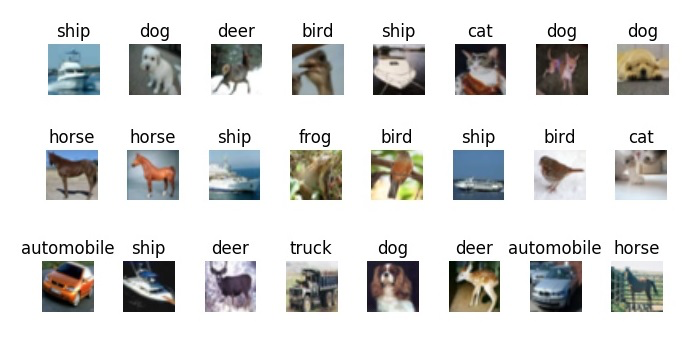

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import random
import numpy as np

np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

## Задание

Задайте гиперпаметры для нейронной сети:

* `input_size` - число входных признаков (равно число пикселей * число каналов). Вычислите `input_size` самостоятельно.

* `hidden_size` - число нейронов на скрытом слое сети. Поставьте 500.

* `num_classes` - число классов. Задайте самостоятельно.

Чему равен `input_size`?


In [2]:
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define Hyper-parameters
input_size = 3*32*32
hidden_size = 500
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

Загрузим данные и масштабируем их.

In [3]:
# MNIST dataset
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                           train=True,
                                           transform=transform,
                                           download=True)

test_dataset = torchvision.datasets.CIFAR10(root='../../data',
                                          train=False,
                                          transform=transform)

100%|██████████| 170498071/170498071 [00:04<00:00, 41482429.22it/s]


Extracting ../../data/cifar-10-python.tar.gz to ../../data


## Задание

Сколько объектов в `train_dataset`?

In [11]:
train_dataset.__len__()

50000

Создадим data-loaders.

In [12]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [18]:
train_loader.__len__()

500

In [21]:
list(enumerate(train_loader))

[(0,
  [tensor([[[[ 0.8353,  0.8275,  0.8510,  ...,  0.5294,  0.5216,  0.4980],
             [ 0.9137,  0.8980,  0.9294,  ...,  0.6549,  0.6471,  0.6471],
             [ 0.9373,  0.9216,  0.9686,  ...,  0.7569,  0.7333,  0.7333],
             ...,
             [-0.2627, -0.2706, -0.2000,  ..., -0.1922, -0.2549, -0.1608],
             [-0.1294, -0.1922, -0.1294,  ..., -0.2078, -0.2549, -0.1529],
             [-0.1451, -0.1686, -0.1137,  ..., -0.2157, -0.2784, -0.1529]],
   
            [[ 1.0000,  0.9765,  0.9765,  ...,  0.9059,  0.8745,  0.8902],
             [ 1.0000,  0.9922,  0.9922,  ...,  0.9529,  0.9529,  0.9765],
             [ 1.0000,  0.9765,  0.9922,  ...,  0.9922,  0.9922,  1.0000],
             ...,
             [-0.0824, -0.0980, -0.0275,  ...,  0.0275, -0.0745, -0.0588],
             [ 0.0588, -0.0118,  0.0510,  ...,  0.0431, -0.0431, -0.0431],
             [ 0.0431,  0.0196,  0.0745,  ..., -0.0039, -0.0824, -0.0353]],
   
            [[ 0.9843,  0.9608,  0.9686,  ...,  0

## Задание

Допишите метод `forward`. Архитектура сети следующая:

1) Полносвязный слой `fc1`

2) Функция активации ReLU

3) Полносвязный слой `fc2`

Сколько нейронов поступает на вход (`in_features`) в слой `fc2`?

In [13]:
print(hidden_size)

500


In [14]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

Задайте Loss - кросс-энтропию и оптимизатор - Adam с learning_rate, определенным константой из первого задания.

In [15]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)

## Задание

Допишите цикл для обучения модели:

1) На вход в цикле подается объект `images` - батч, состоящий из картинок, вытянутых в вектор. Объект `images` переносится на device (на видеокарту, если есть).

2) Каждую сотую итерацию добавляйте значение функции потерь в список log_loss. Значение функции потерь можно посмотреть в `loss.data` (не забудьте перевести tensor в np.array при помощи метода `.numpy()`, а если делаете вычисления на gpu, то `.cpu().numpy()`)

Чему равен loss на последней итерации после отработки цикла? Ответ округлите до целого числа.

In [22]:
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

loss_log = []

# Train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Move tensors to the configured device
        images = images.reshape(-1,3*32*32).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backprpagation and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
            # your code here
            loss_log.append(loss.item())

Epoch [1/10], Step [100/500], Loss: 1.7296
Epoch [1/10], Step [200/500], Loss: 1.3804
Epoch [1/10], Step [300/500], Loss: 1.6979
Epoch [1/10], Step [400/500], Loss: 1.5311
Epoch [1/10], Step [500/500], Loss: 1.5103
Epoch [2/10], Step [100/500], Loss: 1.7173
Epoch [2/10], Step [200/500], Loss: 1.4917
Epoch [2/10], Step [300/500], Loss: 1.6537
Epoch [2/10], Step [400/500], Loss: 1.2993
Epoch [2/10], Step [500/500], Loss: 1.5201
Epoch [3/10], Step [100/500], Loss: 1.2843
Epoch [3/10], Step [200/500], Loss: 1.5853
Epoch [3/10], Step [300/500], Loss: 1.1763
Epoch [3/10], Step [400/500], Loss: 1.2171
Epoch [3/10], Step [500/500], Loss: 1.4764
Epoch [4/10], Step [100/500], Loss: 1.0691
Epoch [4/10], Step [200/500], Loss: 1.1975
Epoch [4/10], Step [300/500], Loss: 1.1974
Epoch [4/10], Step [400/500], Loss: 1.2254
Epoch [4/10], Step [500/500], Loss: 1.4537
Epoch [5/10], Step [100/500], Loss: 1.1360
Epoch [5/10], Step [200/500], Loss: 1.1133
Epoch [5/10], Step [300/500], Loss: 1.0192
Epoch [5/10

## Задание  

Нарисуйте график изменения лосса, используя список `loss_log`.

Что можно сказать по этому графику?

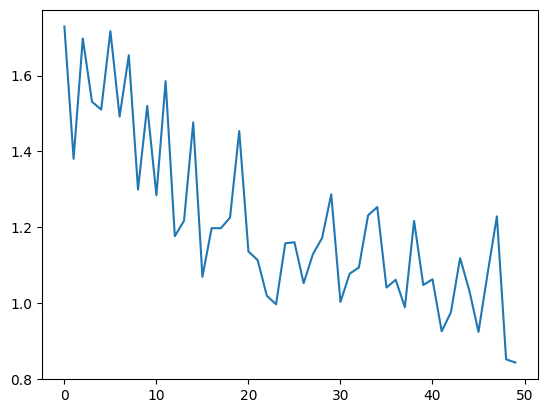

In [23]:
from matplotlib import pyplot as plt

# your code here
plt.plot(loss_log)

## Задание

Допишите цикл тестирования модели:

1) На вход, как и в предыдущем задании, подайте такой же тензор `images` и перенесите его на device

2) Также задайте `labels`

3) Сделайте прогноз модели на мини-батче `images` - результат будет в `outputs`

4) В конце вычислите `accuracy` и выведите ее на экран по формуле $100 \cdot correct / total$

Чему равна `accuracy`? Ответ округлите до целого числа.

In [24]:
np.random.seed(0)
random.seed(0)
torch.manual_seed(0)

# Test the model
# In the test phase, don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1,3*32*32).to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    # your code for accuracy here
    print(f'Accuracy for the network of 10000 images:{100*correct/total}')

# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')

Accuracy for the network of 10000 images:52.07
